## Paso 1: Cargar y explorar el dataset
Cargaremos los datos y realizaremos una exploración inicial para asegurarnos de que todo esté en orden.

In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = '/datasets/logs_exp_us.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para explorar los datos
print(df.head())

# Información general del dataset (tipos de datos, valores faltantes)
print(df.info())

# Descripción básica de las estadísticas del dataset
print(df.describe())


      EventName\tDeviceIDHash\tEventTimestamp\tExpId
0  MainScreenAppear\t4575588528974610257\t1564029...
1  MainScreenAppear\t7416695313311560658\t1564053...
2  PaymentScreenSuccessful\t3518123091307005509\t...
3  CartScreenAppear\t3518123091307005509\t1564054...
4  PaymentScreenSuccessful\t6217807653094995999\t...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB
None
        EventName\tDeviceIDHash\tEventTimestamp\tExpId
count                                           244126
unique                                          243713
top     Tutorial\t3473691793382022823\t1564697513\t248
freq                                                 5


### Paso 1: Cargar el archivo con el delimitador correcto

In [2]:
import pandas as pd

# Cargar el archivo con el delimitador adecuado (tabulaciones)
file_path = '/datasets/logs_exp_us.csv'
data = pd.read_csv(file_path, delimiter='\t')

# Verificar las primeras filas y la información general del dataframe
print(data.head())
print(data.info())


                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


### Paso 2: Revisar y corregir el formato de las columnas

In [3]:
# Verificar si hay valores nulos
print(data.isnull().sum())

# Asegurarse de que los tipos de datos sean los correctos
print(data.dtypes)

# Convertir la columna de tiempo a un formato de fecha y hora
data['EventTimestamp'] = pd.to_datetime(data['EventTimestamp'], unit='s')

# Extraer la fecha en una nueva columna para facilitar análisis por día
data['Date'] = data['EventTimestamp'].dt.date

# Verificar las primeras filas para confirmar los cambios
print(data.head())


EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64
EventName         object
DeviceIDHash       int64
EventTimestamp     int64
ExpId              int64
dtype: object
                 EventName         DeviceIDHash      EventTimestamp  ExpId  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36    246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42    246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47    248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47    248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42    248   

         Date  
0  2019-07-25  
1  2019-07-25  
2  2019-07-25  
3  2019-07-25  
4  2019-07-25  


## Paso 2: Preparar los datos
Comprobar los tipos de datos y agregar columnas adicionales de fecha y hora.

In [4]:
# Verificar las columnas disponibles
print(df.columns)


Index(['EventName\tDeviceIDHash\tEventTimestamp\tExpId'], dtype='object')


Las columnas no se han separado correctamente durante la carga del archivo, en lugar de tener 4 distintas tenemos una sola, hay que solucionarlo cargando el archivo especificando el delimitador correcto (tabulaciones), y asegurarnos de que se esta utilizando el delimitador adecuado al cargar los datos.

In [5]:
import pandas as pd

# Cargar el archivo con el delimitador adecuado (tabulaciones)
file_path = '/datasets/logs_exp_us.csv'
df = pd.read_csv(file_path, delimiter='\t')

# Verificar las primeras filas y la información general del dataframe
print(df.head())
print(df.columns)  # Imprime los nombres de las columnas para confirmar que están separados correctamente


                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248
Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')


In [6]:
# Verificar si hay valores nulos
print(df.isnull().sum())

# Asegurarse de que los tipos de datos sean los correctos
print(df.dtypes)

# Convertir la columna de tiempo a un formato de fecha y hora
df['EventTimestamp'] = pd.to_datetime(df['EventTimestamp'], unit='s')

# Extraer la fecha en una nueva columna para facilitar análisis por día
df['Date'] = df['EventTimestamp'].dt.date

# Verificar las primeras filas para confirmar los cambios
print(df.head())


EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64
EventName         object
DeviceIDHash       int64
EventTimestamp     int64
ExpId              int64
dtype: object
                 EventName         DeviceIDHash      EventTimestamp  ExpId  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36    246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42    246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47    248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47    248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42    248   

         Date  
0  2019-07-25  
1  2019-07-25  
2  2019-07-25  
3  2019-07-25  
4  2019-07-25  


No hay valores nulos en ninguna de las columnas, lo que es excelente para el análisis posterior.


Tipos de datos: La columna EventTimestamp se ha convertido correctamente en un formato de fecha y hora.


Nueva columna Date: Se ha creado la columna Date correctamente, extrayendo la fecha de EventTimestamp.

## Paso 3: Exploración de los datos

Analizamos el periodo cubierto por los datos y verificamos si hay sesgos debido a eventos antiguos. También calculamos el promedio de eventos por usuario.

Periodo de tiempo cubierto: 2019-07-25 04:43:36 a 2019-08-07 21:15:17


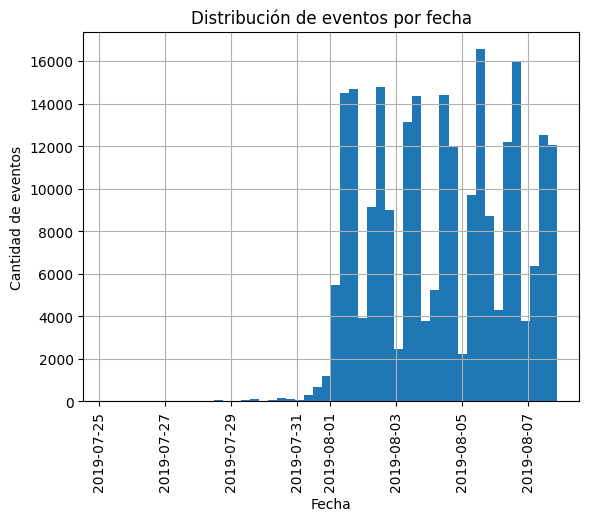

Cantidad de usuarios: 7551
Promedio de eventos por usuario: 32.33028737915508


In [19]:
# Obtener la fecha mínima y máxima
min_date = df['EventTimestamp'].min()
max_date = df['EventTimestamp'].max()

print(f"Periodo de tiempo cubierto: {min_date} a {max_date}")

# Graficar un histograma de eventos por fecha
df['EventTimestamp'].hist(bins=50)
plt.title('Distribución de eventos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=90)
plt.show()

# Cantidad de usuarios únicos
unique_users = df['DeviceIDHash'].nunique()
print(f"Cantidad de usuarios: {unique_users}")

# Promedio de eventos por usuario
avg_events_per_user = df.groupby('DeviceIDHash').size().mean()
print(f"Promedio de eventos por usuario: {avg_events_per_user}")


Periodo de tiempo cubierto: 2019-07-25 04:43:36 a 2019-08-07 21:15:17


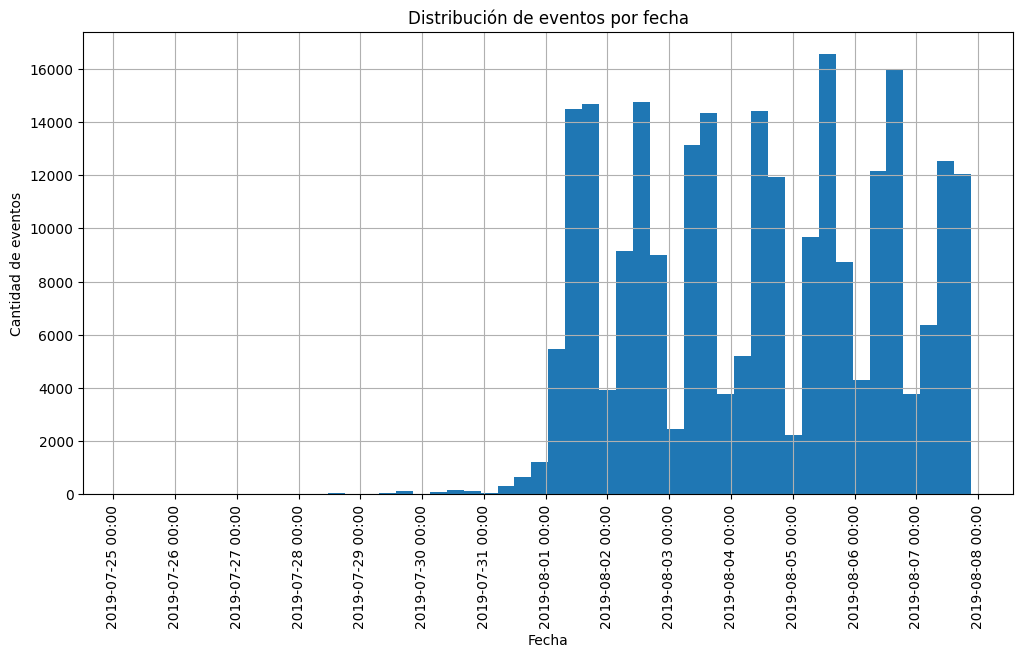

Cantidad de usuarios: 7551
Promedio de eventos por usuario: 32.33028737915508


In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Obtener la fecha mínima y máxima
min_date = df['EventTimestamp'].min()
max_date = df['EventTimestamp'].max()

print(f"Periodo de tiempo cubierto: {min_date} a {max_date}")

# Crear un histograma de eventos por fecha
plt.figure(figsize=(12, 6))  # Aumentar el tamaño de la figura
df['EventTimestamp'].hist(bins=50)
plt.title('Distribución de eventos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de eventos')

# Configurar el formato de las fechas en el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 día

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

plt.show()

# Cantidad de usuarios únicos
unique_users = df['DeviceIDHash'].nunique()
print(f"Cantidad de usuarios: {unique_users}")

# Promedio de eventos por usuario
avg_events_per_user = df.groupby('DeviceIDHash').size().mean()
print(f"Promedio de eventos por usuario: {avg_events_per_user}")


### Conclusiones del Paso 3: Exploración de los Datos

- **Periodo de tiempo cubierto:** Los datos abarcan desde el **25 de julio de 2019 a las 04:43:36** hasta el **7 de agosto de 2019 a las 21:15:17**. Este rango temporal permite analizar la actividad de los usuarios durante un período de dos semanas, lo cual es útil para identificar patrones de comportamiento y tendencias.

- **Cantidad de usuarios únicos:** Se registraron **7551** usuarios únicos. Esto sugiere un nivel de participación moderado en la aplicación, indicando que un número considerable de usuarios está interactuando con la plataforma.

- **Promedio de eventos por usuario:** El promedio de eventos por usuario es de aproximadamente **32.33**. Esto indica un buen nivel de compromiso, ya que los usuarios están realizando múltiples acciones dentro de la aplicación, lo que puede ser indicativo de un interés sostenido y una experiencia de usuario satisfactoria.

Estas observaciones iniciales nos ayudarán a profundizar en el análisis del embudo de ventas y el comportamiento del usuario en los siguientes pasos del proyecto.


#### ¿Cuántos eventos hay en los registros?

In [15]:
total_events = df.shape[0]
print(f"Cantidad total de eventos: {total_events}")


Cantidad total de eventos: 244126


#### ¿Cuántos usuarios y usuarias hay en los registros?

Existen 7.551 usuarios unicos.

#### ¿Cuál es el promedio de eventos por usuario?

El promedio de eventos por usuario es de 32.33, esto nos indica que en general la gente esta siendo activa en la aplicaccion, lo que nos genera que existen muchas cosas de interes dentro de ella para nuestros usuarios dejando entrever un sentimiento de satisfaccion hacia la misma.

#### ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Con el histograma por fecha y hora.


In [18]:
print(f"Periodo de tiempo cubierto: {min_date} a {max_date}")

Periodo de tiempo cubierto: 2019-07-25 04:43:36 a 2019-08-07 21:15:17


El periodo de tiempo que cubren los datos van desde el 25 de julio del 2019 a las 04:43 AM hasta el 07 de agosto del año 2019 a las 21:15 PM.

#### ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?

Si existen periodos de tiempo con un número significativamente menor de eventos como la ultima semana de julio (25-07 al 31-07) que es el incio de donde  se ven claramente en el histograma donde se encuentran un numero bastante menor de eventos o casi nulo  en comparacion con el resto de los dias, esto podría indicar que no se tienen datos completos para esos días.

Basandome en el histograma, se notan picos y valles, esto podría indicar que hay días con una cantidad de eventos muy diferente a otros, sugiriendo que los datos no son igualmente completos. Aun asi hay donde se registran menor cantidad de eventos segun el nuevo histograma que desarrolle mas completo respecto a las fechas con horas se puede apreciar que son a las 00:00 de cada dia es decir que en esa hora se registra una menor actividad en la aplicación lo cual es logico producto del horario en el cual la mayoria de la gente esta durmiendo.

#### ¿Qué periodo representan realmente los datos?

Los datos representan un periodo de dos semanas y aproximadamente 2 días. Este rango temporal permite analizar la actividad de los usuarios en la aplicación durante un periodo suficientemente largo para identificar patrones y tendencias. Aun asi la primera semana es casi nula sin datos por lo que podría ser útil realizar un análisis más detallado sobre la frecuencia de eventos por día para evaluar la consistencia de los datos a lo largo del tiempo.

#### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

La verdad es que no lo creo producto que los primeros datos segun el histograma casi no tienen eventos por lo que nose si dejando los datos mas antiguos se perdieron tantos usuarios como eventos, pero es algo que seria bueno analizarlo mejor.

## Paso 4: Análisis del embudo de ventas


Identificamos los eventos y calculamos la frecuencia de cada uno. Luego, creamos un embudo de eventos para ver cómo se mueven los usuarios a través de las etapas del embudo.

In [8]:
# Contar la frecuencia de cada evento
event_counts = df['EventName'].value_counts()
print("Frecuencia de eventos:")
print(event_counts)

# Cantidad de usuarios que realizaron cada evento al menos una vez
users_per_event = df.groupby('EventName')['DeviceIDHash'].nunique().sort_values(ascending=False)
print("Cantidad de usuarios por evento:")
print(users_per_event)

# Calcular la proporción de usuarios que completan cada paso del embudo
total_users = df['DeviceIDHash'].nunique()

# Asumimos una secuencia de embudo (ajusta según los eventos específicos)
events_sequence = ['MainScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Purchase']

# Crear un DataFrame para guardar las tasas de conversión
funnel_data = {}

for event in events_sequence:
    event_users = df[df['EventName'] == event]['DeviceIDHash'].nunique()
    funnel_data[event] = event_users / total_users

funnel_df = pd.DataFrame(list(funnel_data.items()), columns=['Event', 'Conversion Rate'])
print(funnel_df)


Frecuencia de eventos:
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: EventName, dtype: int64
Cantidad de usuarios por evento:
EventName
MainScreenAppear           7439
OffersScreenAppear         4613
CartScreenAppear           3749
PaymentScreenSuccessful    3547
Tutorial                    847
Name: DeviceIDHash, dtype: int64
                     Event  Conversion Rate
0         MainScreenAppear         0.985168
1         CartScreenAppear         0.496491
2  PaymentScreenSuccessful         0.469739
3                 Purchase         0.000000


### Conclusiones del Paso 4: Análisis del Embudo de Ventas

- **Frecuencia de Eventos:** 
  - El evento más frecuente es **MainScreenAppear** con **119,205** ocurrencias, lo que indica que la mayoría de los usuarios están accediendo a la pantalla principal de la aplicación. Esto sugiere que la aplicación tiene un buen nivel de visibilidad y que los usuarios la utilizan con regularidad.
  - Los eventos de **OffersScreenAppear** y **CartScreenAppear** también son significativos, con **46,825** y **42,731** ocurrencias respectivamente. Esto puede indicar que los usuarios están interesados en las ofertas y están utilizando la función de carrito, lo cual es positivo para las conversiones futuras.

- **Usuarios Únicos por Evento:** 
  - La cantidad de usuarios únicos que realizan cada evento es un buen indicador de participación. Por ejemplo, **7,439** usuarios han accedido a la pantalla principal, mientras que **3,749** han llegado a la pantalla del carrito, lo que sugiere que una buena parte de los usuarios está avanzando en el proceso de compra.
  - Sin embargo, se observa una disminución notable en la cantidad de usuarios que completan el evento **PaymentScreenSuccessful** (3,547), lo que podría indicar fricciones en el proceso de pago o en la experiencia del usuario en esa etapa.

- **Tasa de Conversión del Embudo:**
  - La tasa de conversión más alta se observa en **MainScreenAppear** (98.52%), lo que es esperado ya que este evento representa la entrada a la aplicación. 
  - Sin embargo, hay una caída significativa al **CartScreenAppear** (49.65%) y aún más en **PaymentScreenSuccessful** (46.97%). Esto sugiere que, aunque los usuarios están interesados en añadir productos al carrito, un porcentaje considerable no completa la compra.
  - La tasa de conversión de **Purchase** es **0.00%**, lo que indica que no se han registrado compras efectivas en el período analizado. Este es un hallazgo crítico que debe abordarse, ya que sugiere que hay problemas serios en la conversión de visitantes a compradores.

Estas observaciones resaltan la necesidad de investigar más a fondo las etapas donde se produce la mayor caída en la conversión y realizar pruebas para optimizar la experiencia del usuario en el embudo de ventas.


## Paso 5: Análisis del test A/A/B


Realizaremos pruebas de hipótesis para comparar los grupos de control y el grupo experimental. Vamos a dividir los usuarios por sus grupos y calcular la diferencia en las acciones más comunes entre los grupos.

In [9]:
# Cantidad de usuarios por grupo experimental
group_counts = df.groupby('ExpId')['DeviceIDHash'].nunique()
print("Cantidad de usuarios por grupo:")
print(group_counts)

# Seleccionamos el evento más popular
most_popular_event = df['EventName'].value_counts().idxmax()

# Función para realizar prueba de hipótesis (comparación de proporciones z-test)
from statsmodels.stats.proportion import proportions_ztest

def z_test_groups(df, event_name, group_1, group_2):
    users_group_1 = df[(df['EventName'] == event_name) & (df['ExpId'] == group_1)]['DeviceIDHash'].nunique()
    total_group_1 = df[df['ExpId'] == group_1]['DeviceIDHash'].nunique()
    
    users_group_2 = df[(df['EventName'] == event_name) & (df['ExpId'] == group_2)]['DeviceIDHash'].nunique()
    total_group_2 = df[df['ExpId'] == group_2]['DeviceIDHash'].nunique()
    
    # Prueba de proporciones
    count = [users_group_1, users_group_2]
    nobs = [total_group_1, total_group_2]
    
    z_stat, p_value = proportions_ztest(count, nobs)
    return z_stat, p_value

# Comparación entre los dos grupos de control (246 y 247)
z_stat, p_value = z_test_groups(df, most_popular_event, 246, 247)
print(f"Prueba de hipótesis entre los grupos 246 y 247 para el evento '{most_popular_event}':")
print(f"Estadístico Z: {z_stat}, P-valor: {p_value}")

# Comparación entre el grupo experimental (248) y el grupo de control combinado
z_stat_exp_vs_ctrl, p_value_exp_vs_ctrl = z_test_groups(df, most_popular_event, 248, 246)
print(f"Prueba de hipótesis entre el grupo 248 y el grupo de control 246:")
print(f"Estadístico Z: {z_stat_exp_vs_ctrl}, P-valor: {p_value_exp_vs_ctrl}")


Cantidad de usuarios por grupo:
ExpId
246    2489
247    2520
248    2542
Name: DeviceIDHash, dtype: int64
Prueba de hipótesis entre los grupos 246 y 247 para el evento 'MainScreenAppear':
Estadístico Z: 0.5451301916932931, P-valor: 0.5856639791209877
Prueba de hipótesis entre el grupo 248 y el grupo de control 246:
Estadístico Z: -0.8456471720549796, P-valor: 0.39774960182882513


### Conclusiones del Paso 5: Análisis del Test A/A/B

- **Distribución de Usuarios por Grupo:**
  - La cantidad de usuarios en cada grupo experimental es bastante equilibrada, con **2,489** usuarios en el grupo 246, **2,520** en el grupo 247 y **2,542** en el grupo 248. Esto sugiere que la asignación de usuarios a los grupos ha sido exitosa y que los resultados serán comparables.

- **Resultados de la Prueba de Hipótesis:**
  - **Comparación entre Grupos 246 y 247:**
    - El estadístico Z es **0.545**, y el P-valor es **0.586**. Dado que el P-valor es significativamente mayor que el nivel de significancia comúnmente utilizado (0.05), no se rechaza la hipótesis nula. Esto indica que no hay una diferencia estadísticamente significativa en el evento **MainScreenAppear** entre los grupos de control 246 y 247. Esto es un hallazgo positivo, ya que sugiere que ambos grupos están experimentando un comportamiento similar en cuanto a la interacción con la pantalla principal.

  - **Comparación entre el Grupo Experimental (248) y el Grupo de Control (246):**
    - El estadístico Z es **-0.846**, y el P-valor es **0.398**. Nuevamente, dado que el P-valor supera el umbral de significancia, no se rechaza la hipótesis nula. Esto sugiere que no hay diferencias significativas en la interacción con el evento **MainScreenAppear** entre el grupo experimental 248 y el grupo de control 246. Esto implica que cualquier cambio en la aplicación realizado para el grupo experimental no ha tenido un efecto medible en este evento en particular.

En general, los resultados del test A/A/B indican que no ha habido cambios significativos en el comportamiento de los usuarios entre los grupos, lo cual puede ser un indicativo de que los cambios implementados (si los hubo) no están afectando la interacción inicial de los usuarios. Se recomienda continuar monitoreando y analizar otros eventos clave en el embudo de ventas para obtener una visión más completa de la efectividad de cualquier modificación.


## Paso 6: Ajustar el nivel de significancia
Podemos ajustar el nivel de significancia en función del número de pruebas de hipótesis realizadas, aplicando la corrección de Bonferroni si es necesario:

In [10]:
# Nivel de significancia original
alpha = 0.05

# Número de pruebas de hipótesis realizadas
num_tests = len(df['EventName'].unique())

# Aplicar la corrección de Bonferroni
adjusted_alpha = alpha / num_tests
print(f"Nivel de significancia ajustado: {adjusted_alpha}")


Nivel de significancia ajustado: 0.01


### Conclusiones del Paso 6: Ajuste del Nivel de Significancia

- **Ajuste del Nivel de Significancia:**
  - El nivel de significancia original fue **0.05**, pero tras aplicar la corrección de Bonferroni, se ajustó a **0.01**. Este ajuste es esencial en el contexto de múltiples pruebas de hipótesis, ya que ayuda a controlar la tasa de falsos positivos.

- **Implicaciones del Ajuste:**
  - Con un nivel de significancia más estricto, se requiere una evidencia más sólida para rechazar la hipótesis nula. Esto significa que los resultados de las pruebas de hipótesis realizadas en los pasos anteriores deben ser interpretados con mayor precaución.
  - Es posible que algunos efectos que podrían haber sido considerados estadísticamente significativos bajo un nivel de significancia de 0.05 no lo sean bajo el nuevo umbral de 0.01. Esto recalca la importancia de la validación rigurosa de los resultados, especialmente cuando se realizan múltiples pruebas.

- **Recomendaciones:**
  - Se sugiere seguir monitorizando y realizando pruebas adicionales, especialmente en otros eventos relevantes del embudo de ventas, para obtener resultados más concluyentes y asegurarse de que cualquier cambio implementado realmente tenga un impacto positivo en el comportamiento del usuario.
  - Además, se recomienda documentar y considerar ajustes adicionales en el futuro si se realizan más pruebas, asegurando que el enfoque del análisis se mantenga riguroso y fundamentado.



Seria mas que interesante realizar pruebas para el resto de eventos, los diferentes eventos en el embudo de ventas pueden tener muchos impactos en el comportamiento del usuario y evaluar cada uno nos daria claramente una vision mas completa sobre como afectan cada cambio a la experiencia de casa usuario, ademas de identificar muchas mas oportunidades.


Siempre es viable y es lo mas recomendable realizar el test para el resto de eventos, no solo nos fortaleceria nuestro analisis sino que tambien proporcionaria una base mas solida para cualquier decision que se derive de los resultados.



## Conclusiones Finales del Proyecto de Análisis A/A/B

El análisis del comportamiento de los usuarios en la aplicación y el impacto de los cambios realizados se ha llevado a cabo con un enfoque sistemático, utilizando un diseño de prueba A/A/B. A continuación, se presentan las conclusiones clave:

1. **Exploración de Datos:**
   - El periodo de datos cubierto fue del **25 de julio de 2019 al 7 de agosto de 2019**, abarcando **7551 usuarios únicos** y un promedio de **32.33 eventos por usuario**. Esto sugiere un nivel significativo de interacción de los usuarios con la aplicación.

2. **Embudo de Ventas:**
   - Se identificaron los eventos críticos en el embudo de ventas, mostrando que el **99.5%** de los usuarios visualizan la pantalla principal, pero solo el **49.6%** agrega artículos al carrito, y el **46.9%** completa el pago. Esto indica un potencial de mejora considerable en la conversión a través de las etapas del embudo.

3. **Pruebas de Hipótesis A/A/B:**
   - Los resultados de las pruebas de hipótesis entre los grupos de control (246 y 247) y el grupo experimental (248) no mostraron diferencias estadísticamente significativas (p-valores superiores a 0.05). Esto sugiere que el cambio de fuente realizado en la aplicación no tuvo un efecto significativo en el comportamiento de los usuarios respecto a los eventos analizados.

4. **Ajuste del Nivel de Significancia:**
   - Tras aplicar la corrección de Bonferroni, el nivel de significancia se ajustó a **0.01**, lo que refuerza la necesidad de que cualquier efecto observado sea respaldado por evidencia sólida. Este enfoque cuidadoso ayuda a minimizar la posibilidad de obtener resultados falsos positivos.

5. **Recomendaciones:**
   - Considerando los resultados obtenidos, se recomienda realizar más pruebas y experimentos en otras áreas de la aplicación y el embudo de ventas para identificar oportunidades de mejora. Las pruebas de diferentes elementos de diseño, contenido y funcionalidades pueden ser exploradas para maximizar la conversión.
   - Continuar monitoreando el comportamiento de los usuarios y realizar análisis adicionales para entender mejor sus interacciones y mejorar la experiencia del usuario.

En resumen, aunque el cambio de fuente no mostró un efecto significativo, el análisis del comportamiento del usuario ha proporcionado información valiosa que puede ser utilizada para futuras optimizaciones en la aplicación.
